In [1]:
from train import *

total parameters: 3049


In [2]:
weight = torch.load('./save/weights/80000.dat')
# model.load_state_dict(weight)

In [3]:
# weight['l1.z.weight'].shape

In [4]:
evaluate(weight, idx=8)

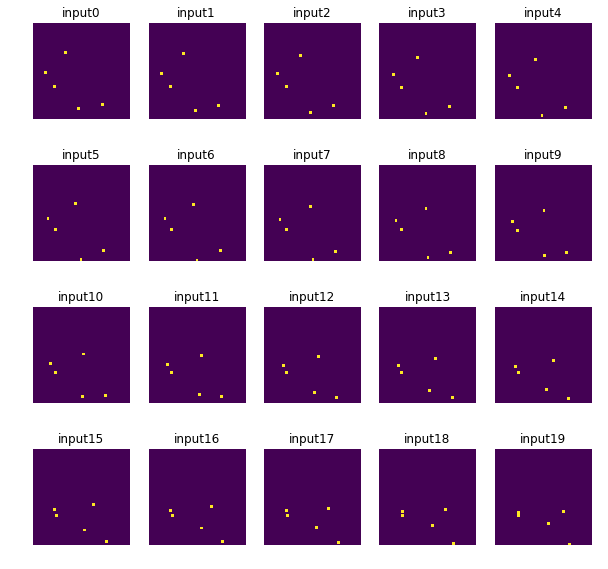

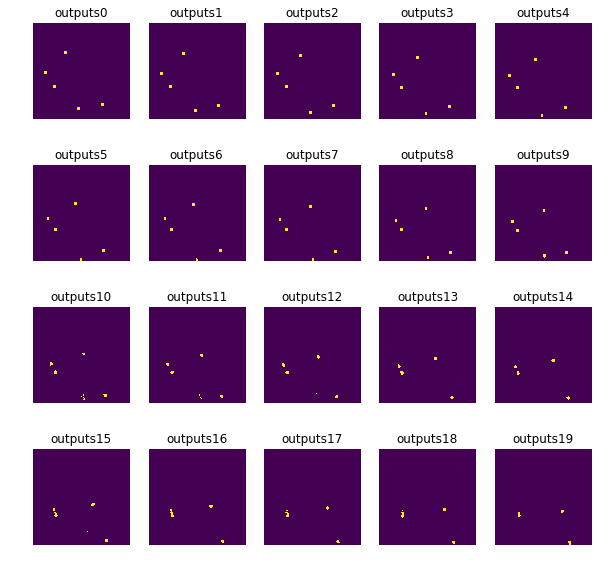

In [5]:
%run get_res.py

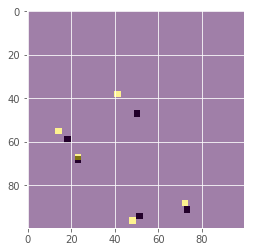

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x=1
plt.ion()
i=np.array(ips[4])
j=np.array(ips[9])
plt.imshow(i)
x=plt.imshow(j, cmap='Greys', alpha=0.5)
# plt.figure()
# plt.imshow(np.bitwise_xor(i,j))
# np.bitwise_xor(i,j).sum()

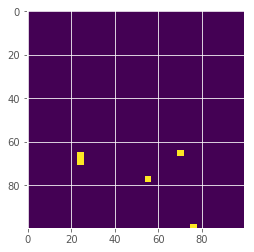

In [7]:
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i in ips:
    ims.append([plt.imshow(i)])

anim = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=2000)

from IPython.display import HTML
HTML(anim.to_html5_video())


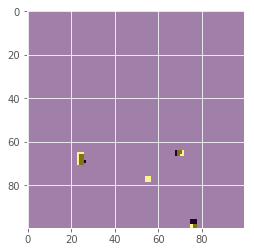

In [8]:
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, j in zip(ips, ops):
    im1 = plt.imshow(i)
    im2 = plt.imshow(j, cmap='Greys', alpha=0.5)
    ims.append([im1,im2])

anim = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=2000)

from IPython.display import HTML
# HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

In [9]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
def f(i):
    plt.figure(2,figsize=(8,8))
    x=np.array(ips[i])
    y=np.array(ops[i])
    plt.imshow(x, alpha=0.5)
    plt.imshow(y, cmap='Greys', alpha=0.5)

interactive_plot = interactive(f, i=(0,19))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=9, description='i', max=19), Output(layout=Layout(height='500px'))), _do…

In [10]:
input=getSequence(3)
for i in tqdm(range(100)):
    with torch.no_grad():
        output, hidden = model(input)

100%|██████████| 100/100 [00:01<00:00, 96.13it/s]


In [11]:
def accuracy():
    with torch.no_grad():
        l = 0.0
        for i in tqdm(range(n)):
            target = getSequence(i)
            x = dropoutInput(target)
            output, _ = model(x)
            loss = criterion(output, target)
            l += loss.item()

    return l/n

accuracy()

100%|██████████| 5000/5000 [00:52<00:00, 95.16it/s]


709.9466979248047

In [12]:
w,h,l

(100, 100, 20)

In [13]:

def show_h(seq,hn,cha):
    fig=plt.figure(3,figsize=(8,8))
    p=plt.imshow(hidden[seq][hn][0,cha].cpu())
    fig.colorbar(p)


interactive_plot = interactive(show_h, seq=(0,9), hn=(0,2),cha=(0,15))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=4, description='seq', max=9), IntSlider(value=1, description='hn', max=2…

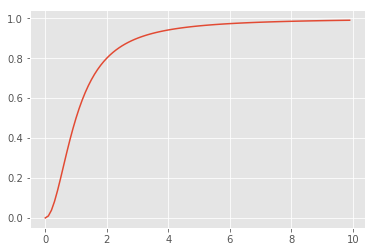

In [14]:
x=np.arange(0,10,0.1)
y =x*x/(1+x*x)
plt.plot(x,y)